In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RBF:
    
    def __init__(self, hidden_shape, sigma):
        
        self.hidden_shape = hidden_shape
        self.sigma = sigma
    
    def kernal_function(self, center, datapoint):
        
        return np.exp(-self.sigma * np.linalg.norm(center-datapoint)**2)
    
    def generate_interpollation_matrix(self, X):
        
        G = np.zeros((X.shape[0], self.hidden_shape))
        
        for i, datapoint in enumerate(X):
            
            for j, center in enumerate(self.centers):
                
                G[i][j] = self.kernal_function(center, datapoint)
        
        return G
    
    def select_centers(self, X):
        
        args = np.random.choice(X.shape[0], self.hidden_shape)
        
        centers = X[args]
        
        return centers
    
    def fit(self, X, y):
        
        self.centers = self.select_centers(X)
        G = self.generate_interpollation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(G), y)
    
    def predict(self, X):
        
        G = self.generate_interpollation_matrix(X)
        y_preds = np.dot(G, self.weights)
        
        return y_preds


In [3]:
X = np.linspace(0,10,100)
y = np.cos(X)

In [4]:
model = RBF(hidden_shape=10, sigma=1)

In [5]:
model.fit(X, y)

In [6]:
y_preds = model.predict(X)

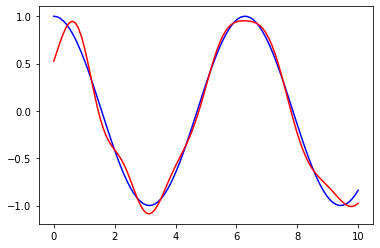

In [11]:
fig, ax = plt.subplots()

ax.plot(X, y, c="blue")
ax.plot(X, y_preds, c="red")